In [1]:
# Cell 1: Mount Google Drive to access files (optional if file is in /content)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# Check if the file really exists and its size
import os

zip_path = "/content/archive (11).zip"
print("Exists:", os.path.exists(zip_path))
print("Size (bytes):", os.path.getsize(zip_path))


Exists: True
Size (bytes): 50331648


In [7]:
# Detect file type
!file "/content/archive (11).zip"


/content/archive (11).zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [8]:
# Use system unzip (works with v4.5 zip files)
!unzip "/content/archive (11).zip" -d /content/dataset


Archive:  /content/archive (11).zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive (11).zip or
        /content/archive (11).zip.zip, and cannot find /content/archive (11).zip.ZIP, period.


In [9]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(root, "->", len(files), "files")


In [11]:
# Cell 2: Unzip dataset (archive (11).zip) into working directory
import os

zip_path = "/content/archive (11).zip"   # updated path
extract_path = "/content/dataset"

# Use system unzip for compatibility with v4.5 zip files
!unzip -q "{zip_path}" -d "{extract_path}"

print("Files extracted to:", extract_path)


[/content/archive (11).zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive (11).zip or
        /content/archive (11).zip.zip, and cannot find /content/archive (11).zip.ZIP, period.
Files extracted to: /content/dataset


In [12]:
# Cell 3: Check dataset folder structure
import os

for root, dirs, files in os.walk(extract_path):
    print(root, "->", len(files), "files")


In [13]:
# Cell 4: Import required libraries for preprocessing
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob


In [14]:
# Cell 5: Define preprocessing function (resize + normalize bands)
def preprocess_image(img_path, size=(128, 128)):
    img = Image.open(img_path).convert('RGB')  # open as RGB
    img = img.resize(size)  # resize image
    img_array = np.array(img) / 255.0  # normalize pixel values
    return img_array


In [16]:
# Check what was extracted
!ls -R /content


/content:
'archive (11).zip'   drive   sample_data

/content/drive:
MyDrive  Othercomputers  Shareddrives

/content/drive/MyDrive:
 3DE974D2-2FBF-4DA8-975E-0FC24C96689B.png
 43249b42-497e-44ba-8bfe-c4ac9b7ee117.jpeg
 740c287d-5caa-45c9-8f7e-c47344c3d5d8.JPG
 91EE7475-DC03-47EF-9DCD-15C8B347F922.jpeg
'Annual financial data.gsheet'
'Assignment 08.gdoc'
'Assignment 6 (14 Dec 2022 at 11:02 PM)'
'Assignment#8 (4 Jan 2024 at 21:39).jpg'
 Attendance.gsheet
 AUDIO-2024-06-14-19-15-09.m4a
 ch1.gslides
 ch2.gdoc
'Chapter_1_v8.2 (1).gslides'
'Chapter_1_v8.2 (2).gslides'
 Chapter_1_v8.2.gslides
 Classroom
 cleaned_watches_dataset.csv
'Colab Notebooks'
 Doc1-1.pdf
 eba42d35-19f7-4520-accd-f3d3f73c6528.jpeg
 F8E817E5-E611-45E6-B6FB-55FFD09BA120.png
 FF8AED1A-2795-4E78-97E7-EF6E94731EEC.png
 final.gslides
'Grade book (1).gsheet'
'Grade book (2).gsheet'
'Grade book (3).gsheet'
'Grade book (4).gsheet'
'Grade book.gsheet'
' Id .jpg'
'Id .jpg'
 image.jpg
 IMG_1005.PNG
 IMG_1291.jpg
 IMG_1292.jpg
'IMG_231

In [18]:
import zipfile
import os

zip_path = "/content/archive (11).zip"
extract_path = "/content/archive_extracted"

# فك الضغط
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# عرض الملفات المستخرجة
os.listdir(extract_path)


['eurosat']

In [23]:
# Cell 6: Apply preprocessing to all images and verify labels (support multiple extensions)
dataset_images = []
dataset_labels = []

extract_path = "/content/archive_extracted/eurosat"  # updated path
classes = sorted(os.listdir(extract_path))  # folder names = labels

valid_exts = ["*.jpg", "*.jpeg", "*.png", "*.tif"]

for label in classes:
    class_path = os.path.join(extract_path, label)
    if os.path.isdir(class_path):
        for ext in valid_exts:
            for img_path in glob.glob(os.path.join(class_path, ext)):
                dataset_images.append(preprocess_image(img_path))
                dataset_labels.append(label)

print("Total samples:", len(dataset_images))
print("Classes:", classes)


Total samples: 0
Classes: ['rgb']


In [29]:
import os

for root, dirs, files in os.walk("/content/archive_extracted/eurosat"):
    print(root, "->", len(files), "files")


/content/archive_extracted/eurosat -> 0 files
/content/archive_extracted/eurosat/rgb -> 0 files
/content/archive_extracted/eurosat/rgb/2.0.0 -> 4 files


In [27]:
print("Samples:", len(dataset_images))
print("First label:", dataset_labels[0] if dataset_labels else "No labels found")


Samples: 0
First label: No labels found


In [30]:
import tensorflow_datasets as tfds

# المسار اللي فيه الملفات
data_dir = "/content/archive_extracted"

# تحميل الداتا
dataset, info = tfds.load("eurosat/rgb", data_dir=data_dir, with_info=True, as_supervised=True)

print(info)


tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='/content/archive_extracted/eurosat/rgb/2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    superv

In [31]:
# Cell 7: Convert labels (text) into numeric encoding
# This cell loads EuroSAT (RGB version) from the extracted TFRecord format
import tensorflow_datasets as tfds

data_dir = "/content/archive_extracted"

# Load dataset with info
dataset, info = tfds.load(
    "eurosat/rgb",
    data_dir=data_dir,
    with_info=True,
    as_supervised=True
)

print(info)


tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='/content/archive_extracted/eurosat/rgb/2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    superv

In [32]:
# Cell 8:Explore data set info
# This cell explores dataset details
num_classes = info.features['label'].num_classes
class_names = info.features['label'].names
total_samples = info.splits['train'].num_examples

print(f"Total samples: {total_samples}")
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")



Total samples: 27000
Number of classes: 10
Class names: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [33]:
# Cell 9: Split dataset into train/validation sets
from sklearn.model_selection import train_test_split
import numpy as np
train_size = 0.8
train_data = dataset['train'].take(int(total_samples * train_size))
val_data = dataset['train'].skip(int(total_samples * train_size))

print(f"Train size: {len(list(train_data))}")
print(f"Validation size: {len(list(val_data))}")


Train size: 21600
Validation size: 5400


In [35]:
# cell 10: preprocessing function This cell defines preprocessing: resize, normalize, augment
import tensorflow as tf

IMG_SIZE = 64  # Resize target

def preprocess(image, label, augment=False):
    # Resize and normalize
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0

    if augment:
        # Random augmentations
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_contrast(image, 0.8, 1.2)

    return image, label


In [36]:
# Cell 11 — Build DataLoader pipelines
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_loader = (
    train_data
    .map(lambda x, y: preprocess(x, y, augment=True), num_parallel_calls=AUTOTUNE)
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

val_loader = (
    val_data
    .map(lambda x, y: preprocess(x, y, augment=False), num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)


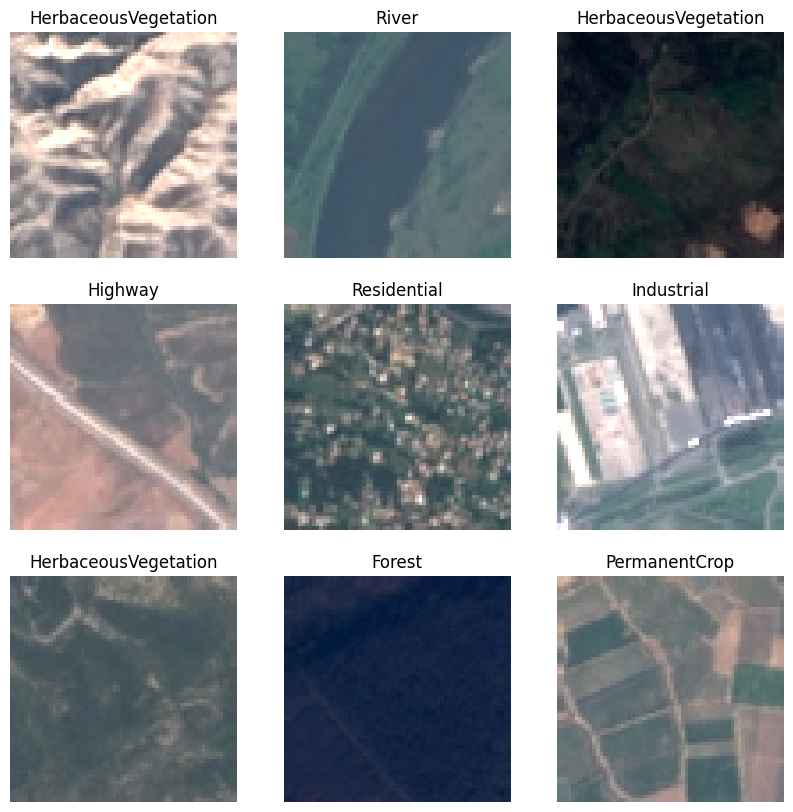

In [37]:
#  Cell 12 — Visualize some samples
import matplotlib.pyplot as plt

for images, labels in train_loader.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
    break


In [38]:
# Cell 13 — Define CNN model
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

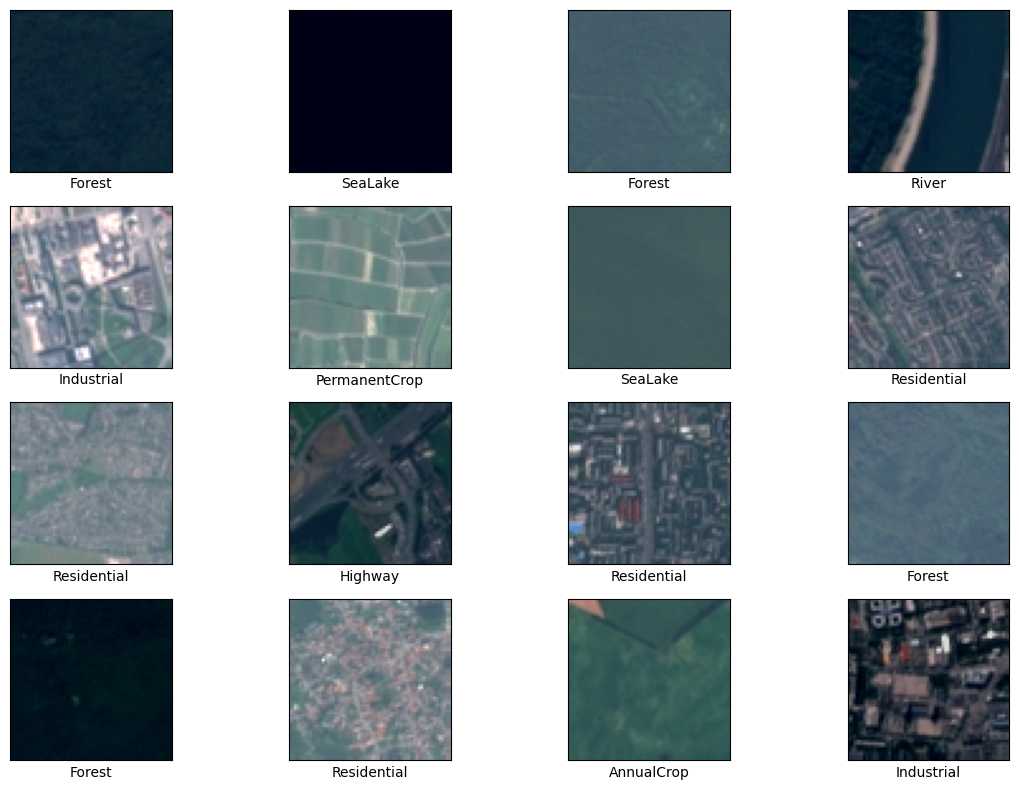

In [40]:
# cell:13 shows one full batch (up to 16 images) with labels below
for images, labels in train_loader.take(1):
    plt.figure(figsize=(12, 8))
    for i in range(min(16, images.shape[0])):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy())
        plt.xlabel(class_names[labels[i].numpy()])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
    break


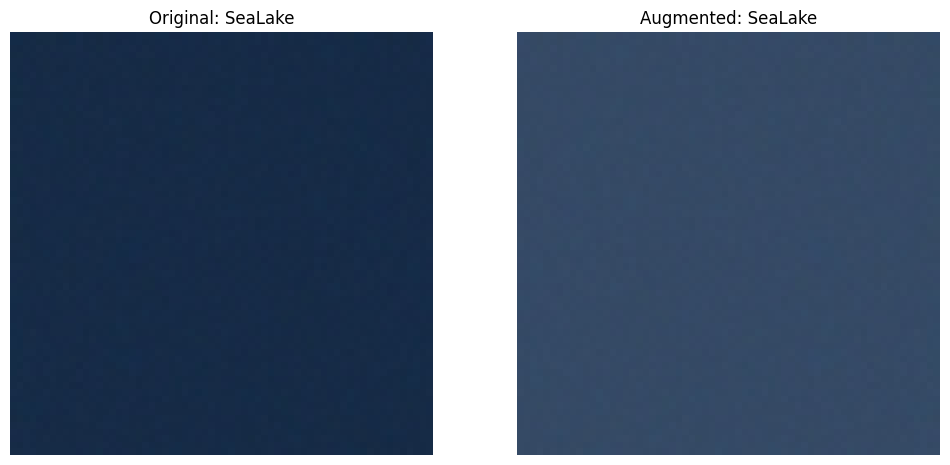

In [41]:
#cell:14 compares preprocessing with and without augmentation
raw_train = dataset['train'].take(1)  # one raw sample

for image, label in raw_train:
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image.numpy())
    plt.title(f"Original: {class_names[label.numpy()]}")
    plt.axis("off")

    # Augmented image
    aug_img, aug_label = preprocess(image, label, augment=True)
    plt.subplot(1, 2, 2)
    plt.imshow(aug_img.numpy())
    plt.title(f"Augmented: {class_names[aug_label.numpy()]}")
    plt.axis("off")

    plt.show()
    break


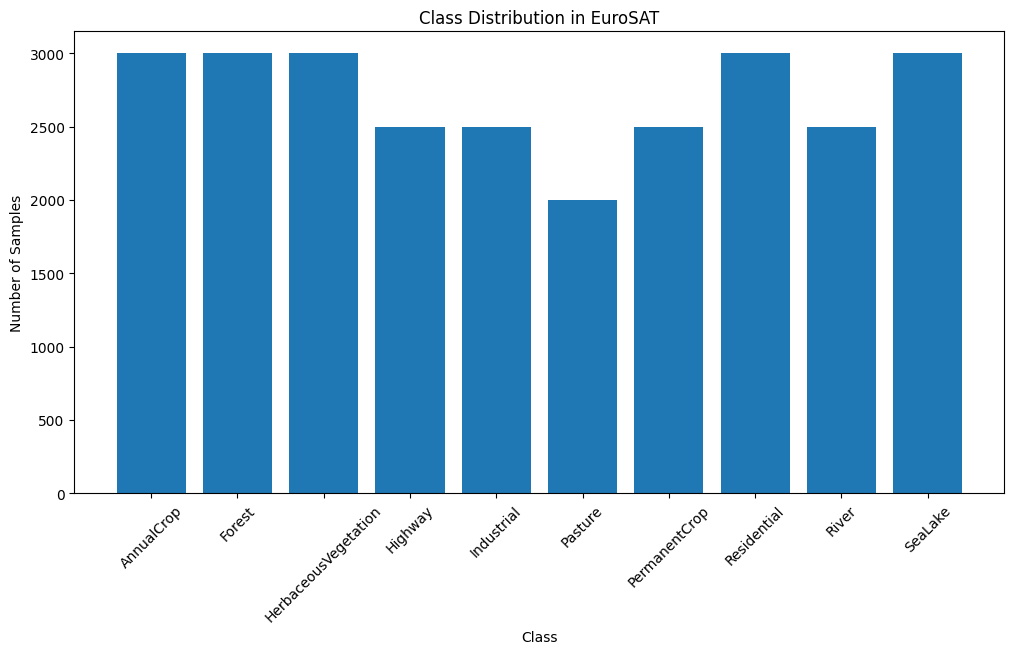

In [42]:
# cell:15 plots class distribution in the dataset
import collections

# Count labels from raw dataset
label_counts = collections.Counter()
for _, label in dataset['train']:
    label_counts[int(label.numpy())] += 1

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), [label_counts[i] for i in range(num_classes)])
plt.xticks(range(num_classes), class_names, rotation=45)
plt.title("Class Distribution in EuroSAT")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


In [43]:
# cell:16 calculates dataset statistics (mean & std per channel)
import numpy as np

channel_sum = np.zeros(3)
channel_sum_sq = np.zeros(3)
num_pixels = 0

for img, _ in dataset['train']:
    img = tf.cast(img, tf.float32) / 255.0  # normalize [0,1]
    img_np = img.numpy()
    channel_sum += img_np.mean(axis=(0,1))
    channel_sum_sq += (img_np ** 2).mean(axis=(0,1))
    num_pixels += 1

mean = channel_sum / num_pixels
std = np.sqrt(channel_sum_sq / num_pixels - mean ** 2)

print("Channel means (R,G,B):", mean)
print("Channel stds (R,G,B):", std)


Channel means (R,G,B): [0.33978004 0.38037542 0.40250709]
Channel stds (R,G,B): [0.20368165 0.13754398 0.11613618]


In [39]:
# cell 17: Compile & Train model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 10

history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=EPOCHS
)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 247s 359ms/step - accuracy: 0.3276 - loss: 1.7353 - val_accuracy: 0.6006 - val_loss: 1.0313
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 222s 328ms/step - accuracy: 0.6003 - loss: 1.1225 - val_accuracy: 0.6552 - val_loss: 0.9191
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 216s 320ms/step - accuracy: 0.6630 - loss: 0.9514 - val_accuracy: 0.7478 - val_loss: 0.6947
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 216s 319ms/step - accuracy: 0.6942 - loss: 0.8721 - val_accuracy: 0.7631 - val_loss: 0.6506
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 244s 361ms/step - accuracy: 0.7203 - loss: 0.7990 - val_accuracy: 0.7889 - val_loss: 0.5920
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 220s 325ms/step - accuracy: 0.7416 - loss: 0.7427 - val_accuracy: 0.8150 - val_loss: 0.5125
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 224s 331ms/step - accuracy: 0.7696 - loss: 0.6644 - val_accuracy: 0.8104 - val_loss: 0.5357
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 228s 337ms/step - accuracy: 0.7842 -